In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Minimize <font color="blue" size="3">**_f(x) = (x-3)_**<sup>**2**</sup>

In [ ]:
from scipy.optimize import minimize

def f(x):
  return (x-3)**2

result = minimize(f,2) # since the resultant is not a single value so we have to get the actual value
local_min = f"{result.x[0]:.2f}"
print(local_min)


3.00


Minimize <font color="blue"> **f(x,y) = (x-1)<sup>2</sup>+(y-2.5)**<sup>2</sup> </font> with subject to:

<font color="red">
x-2y+2 &#8805; 0, -x-2y+6 &#8805; 0, -x+2y+2 &#8805; 0, x &#8805; 0, y &#8805; 0
</font>

In [ ]:
fun = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2 #here x will be given as vector containing both x and y

#constraints functions should be always >= 0
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
               {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
               {'type': 'ineq', 'fun': lambda x: x[0]+2*x[1]+2},
               )
bounds = ((0,None),(0,None))

result = minimize(fun,[2,0],constraints = constraints , bounds=bounds)
result.x

array([1.4, 1.7])

<font color="black" size="5">**_Interpolation_** </font>

[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6. ]
[ 0.          0.38941834  0.71735609  0.93203909  0.9995736   0.90929743
  0.67546318  0.33498815 -0.05837414 -0.44252044 -0.7568025  -0.95160207
 -0.99616461 -0.88345466 -0.63126664 -0.2794155 ]


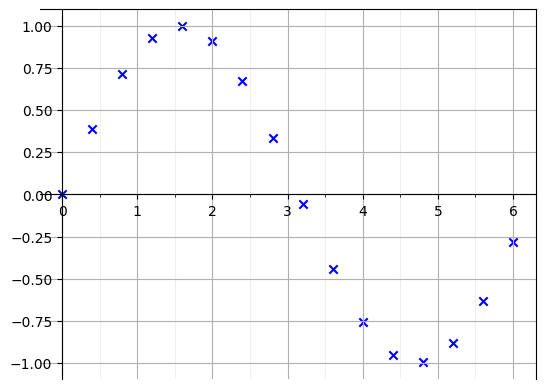

In [ ]:
x = np.arange(0, 2*np.pi, 0.4)
y = np.sin(x)
print(x)
print(y)
plt.scatter(x,y,color="blue",marker="x")

ax = plt.gca()  # gca = get current axis


# to set the axis x at y=0, we can simply give'zero' to set_position() and to set in specific position
#other than zero, we give tuple ('data',value) to set_position()
# for example:
#  ax.spines["left"].set_position(('data',3)) this will set the y-axis at x= 3
# but for now we will set both x and y axis at origin
ax.spines["bottom"].set_position('zero')
ax.spines["left"].set_position('zero')


major_ticks = np.arange(0, 7, 1)
minor_ticks = np.arange(0.5, 6.5, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks,minor=True)

# Set grid properties
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)


<font color="blue"> Now,using the interpolation, we can find the value of any point inside the range of given x. we will use cubic spline interpolation. </font>

In [ ]:
from scipy.interpolate import interp1d #interp1d is 1-dimensional linear interpolation
interpolation_function = interp1d(x,y,kind="cubic")
#now we will calculate y at x = 0.6 which is not given in dataset
calculated_y = interpolation_function(0.6)
print(calculated_y)

0.5645272878487455
0.5646424733950354


<font color="blue">**_Sympy_** library can be used to calculate the derivatives and intergration of the functions where as **_numpy_** and **_scipy_** only allows to compute the numerical differentiation and integration </font>

In [ ]:
import sympy as sp

# Define the symbolic variables
x, y = sp.symbols('x y')

# Define the function f(x, y) = x^2 + 2xy
f = x**2 + 2*x*y

# Calculate the derivative of f with respect to x
derivative_fx = sp.diff(f, x)

print("Derivative of f(x, y) with respect to x =", derivative_fx)


Derivative of f(x, y) with respect to x = 2*x + 2*y


<font color="blue">Numerical differentiation using **scipy** </font>



<ipython-input-3-0152c5f3545c>:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  first_ord_der = derivative(fun,x,dx=1e-6)
<ipython-input-3-0152c5f3545c>:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  second_ord_der = derivative(fun,x,dx=1e-6,n=2)


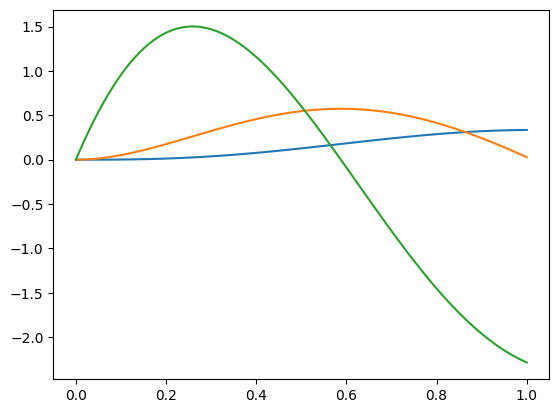

In [ ]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
  return  x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0,1,100)
first_ord_der = derivative(fun,x,dx=1e-6)
second_ord_der = derivative(fun,x,dx=1e-6,n=2)
plt.plot(x,fun(x));
plt.plot(x,first_ord_der);
plt.plot(x,second_ord_der);

<font color="blue" > **Numerical Integration**</font>




In [ ]:
from scipy.integrate import quad

integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand,0,1) # where 0 = lower limit, 1 = upper limit
integral

0.10246777930717413

<font color="blue">Double Integration </font>

In [ ]:
from scipy.integrate import dblquad
integrand = lambda x,y: np.sin(x+y**2)
lwr_y = lambda x: -x # inner lower limit
upr_y = lambda x: x**2 #inner upper limit
integral,integral_error = dblquad(integrand,0,1,lwr_y,upr_y) # 0 = outer lwr limit , 1 = outer upr limit
integral

0.315802507240474

In [ ]:
import numpy as np
mat = np.identity(4)
mat

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score


# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression instance
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred = linear_regressor.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.01043966404825412
R-squared: 0.9999985121389936


In [ ]:
new_y = linear_regressor.predict([[-0.8234,-2.343]])
print(len(X_train))

800
